In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [107]:
data=pd.read_csv("E:/Machine Learning/DATASETS/Bengaluru housing data/Bengaluru_House_Data.csv")

In [108]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [110]:
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

since society column has nearly half of the values missing, it is better to drop that column


In [111]:
data['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
10 BHK           2
11 Bedroom       2
11 BHK           2
14 BHK           1
43 Bedroom       1
16 BHK           1
12 Bedroom       1
19 BHK           1
18 Bedroom       1
13 BHK           1
27 BHK           1
Name: size, dtype: int64

In size column values are written in two different forms i.e bhk and bedrooms

As there are only 16 values missing , we can replace them with mode i.e 2 BHK

In [112]:
data['size'].fillna(value='2 BHK',inplace=True)

In [113]:
data['size'].isna().sum()

0

In [114]:
data['location'].value_counts()

Whitefield                            540
Sarjapur  Road                        399
Electronic City                       302
Kanakpura Road                        273
Thanisandra                           234
                                     ... 
Double Road                             1
pavitra paradise                        1
MEI layout, Bagalgunte                  1
Mango Garden Layout                     1
Banashankari 6th stage , 2nd block      1
Name: location, Length: 1305, dtype: int64

It also has only one missing value we can replace it with mode i.e Whitefield

In [115]:
data['location'].fillna(value='Whitefield',inplace=True)

In [116]:
data['bath'].fillna(value=data['bath'].median(),inplace=True)

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   size          13320 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13320 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [118]:
data.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

<AxesSubplot:xlabel='area_type', ylabel='count'>

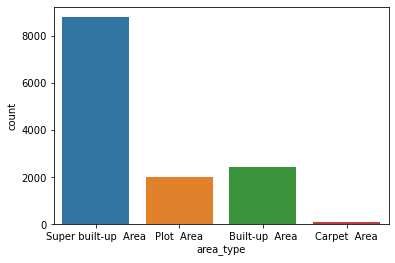

In [119]:
sns.countplot(x=data['area_type'])

most of the area type is super built up followed by built-up area and plot area

In [120]:
data['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
14-Nov               1
14-Jul               1
16-Nov               1
16-Oct               1
17-Jan               1
Name: availability, Length: 81, dtype: int64

We can drop availability column as this will not affect price much

We can drop area_type,balcony since we have total sqft area

We can drop society as it have many missing values

In [121]:
data.drop(['availability','area_type','balcony','society'],inplace=True,axis=1)

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [123]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

We can split number and strings and then we can remove the string part

In [124]:
data['BHK']=data['size'].str.split(' ').str.get(0).astype(int)

In [125]:
data['BHK'].head()

0    2
1    4
2    3
3    3
4    2
Name: BHK, dtype: int32

In [126]:
data[data['BHK']>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


Comparing BHK and total sqft we can say that these are wrong enteries and are outliers\

In [127]:
data.drop(['size'],inplace=True,axis=1)

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   total_sqft  13320 non-null  object 
 2   bath        13320 non-null  float64
 3   price       13320 non-null  float64
 4   BHK         13320 non-null  int32  
dtypes: float64(2), int32(1), object(2)
memory usage: 468.4+ KB


total_sqft should be interger or float but it is an object , it contains some values in range like 2000-3000....
we have to change this

In [129]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [130]:
def ConvertRangetoInt(x):
    temp=x.split('-')
    if len(temp)==2:
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [131]:
data['total_sqft']=data['total_sqft'].apply(ConvertRangetoInt)

In [132]:
data['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

### Price per sqft

In [133]:
data['price_per_sqft']=data['price']*100000/data['total_sqft'] #multiplied with 100000 because the prices were scaled

In [134]:
data.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


### Location Column

In [135]:
data['location'].value_counts()

Whitefield                            541
Sarjapur  Road                        399
Electronic City                       302
Kanakpura Road                        273
Thanisandra                           234
                                     ... 
Double Road                             1
pavitra paradise                        1
MEI layout, Bagalgunte                  1
Mango Garden Layout                     1
Banashankari 6th stage , 2nd block      1
Name: location, Length: 1305, dtype: int64

we can observe that there are 1305 different locations and it is not possible to encode these many values

We will remove locations which has count 10 or less than 10

we are going to use Dimentionality Reduction for the data which are categorical variable. We need to apply Dimensionality Reduction here to reduce number of locations

In [136]:
#Removing whitespaces
data['location']=data['location'].apply(lambda x:x.strip())

In [137]:
data['location'].value_counts()

Whitefield            542
Sarjapur  Road        399
Electronic City       304
Kanakpura Road        273
Thanisandra           237
                     ... 
K N Extension           1
Vijaya Bank Colony      1
Gandhi Nagar            1
Saptagiri Layout        1
Sahyadri Layout         1
Name: location, Length: 1294, dtype: int64

We can observe that due to whitespaces , places were repeating and now number is reduced to 1294

In [138]:
location_count=data['location'].value_counts()

In [139]:
location_count

Whitefield            542
Sarjapur  Road        399
Electronic City       304
Kanakpura Road        273
Thanisandra           237
                     ... 
K N Extension           1
Vijaya Bank Colony      1
Gandhi Nagar            1
Saptagiri Layout        1
Sahyadri Layout         1
Name: location, Length: 1294, dtype: int64

In [140]:
location_count_less_10=location_count[location_count<=10]

In [141]:
location_count_less_10

Gunjur Palya          10
Nagadevanahalli       10
Basapura              10
Ganga Nagar           10
BTM 1st Stage         10
                      ..
K N Extension          1
Vijaya Bank Colony     1
Gandhi Nagar           1
Saptagiri Layout       1
Sahyadri Layout        1
Name: location, Length: 1053, dtype: int64

In [142]:
data['location']=data['location'].apply(lambda x:'other' if x in location_count_less_10 else x)

In [143]:
data['location'].value_counts()

other                        2885
Whitefield                    542
Sarjapur  Road                399
Electronic City               304
Kanakpura Road                273
                             ... 
HAL 2nd Stage                  11
2nd Phase Judicial Layout      11
Nehru Nagar                    11
LB Shastri Nagar               11
Narayanapura                   11
Name: location, Length: 242, dtype: int64

Text(0, 0.5, 'total_sqft')

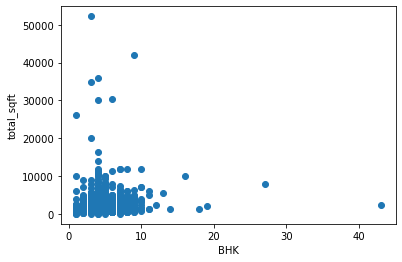

In [144]:
plt.scatter(x='BHK',y='total_sqft',data=data)
plt.xlabel('BHK')
plt.ylabel('total_sqft')

Most of the points are between 0-10 but there are some points near 30 and 40 which are our outliers

array([[<AxesSubplot:title={'center':'BHK'}>]], dtype=object)

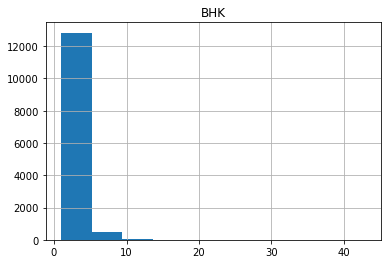

In [145]:
data.hist(['BHK'])

array([[<AxesSubplot:title={'center':'total_sqft'}>]], dtype=object)

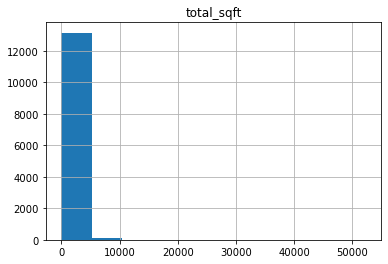

In [146]:
data.hist(['total_sqft'])

<AxesSubplot:xlabel='BHK'>

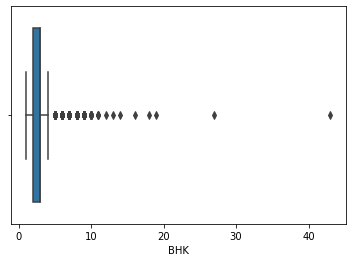

In [147]:
sns.boxplot(x='BHK',data=data)

By looking at this boxplot we can confirm that there are outliers in BHK

In [148]:
data.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


observe that the minimun total_sqft is 1 which is surely an outlier as it is not possible that total sqft will only be of 1

In [149]:
#As total_sqft and bhk are connected we can divide them and check for per sqft
(data['total_sqft']/data['BHK']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

there is a house which has 0.25 value as min ,
our 25% value is 473 so we can set a threshold of 300 so that we can remove houses below than that

In [150]:
data=data[((data['total_sqft']/data['BHK'])>=300)]

In [151]:
data.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


Now our minimum is 300 

But there maybe some more outliers

In [152]:
data.shape

(12530, 6)

In [153]:
data.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

<AxesSubplot:ylabel='price_per_sqft'>

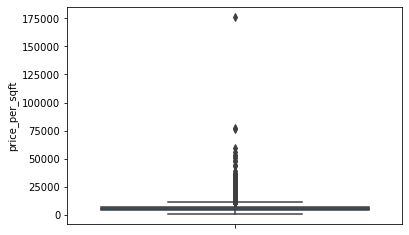

In [154]:
sns.boxplot(y='price_per_sqft',data=data)

In [155]:
#FUNCTION TO REMOVE OUTLIERS(ANY VALUEOF DATA IN RANGE OF MEAN-STANDARD DEVIATION AND MEAN+STANDARD DEVIATION IS OBMITTED)
#(M-ST<VALUE<=M+ST) 
def remove_outliers_price_per_sqft(df):
    df_output=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        gen_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_output=pd.concat([df_output,gen_df],ignore_index=True)
    return df_output
data=remove_outliers_price_per_sqft(data)

In [156]:
data.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000
mean,1508.440608,2.471702,91.286372,2.574896,5659.062876
std,880.694214,0.979449,86.342786,0.897649,2265.774749
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4244.897959
50%,1286.000000,2.000000,67.000000,2.000000,5175.600739
75%,1650.000000,3.000000,100.000000,3.000000,6428.571429
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [157]:
data.shape

(10301, 6)

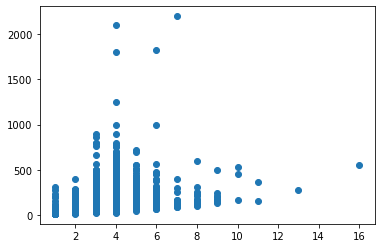

In [158]:
plt.scatter(x='BHK',y='price',data=data)

C:\Users\Nimit Vanawat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BHK'>

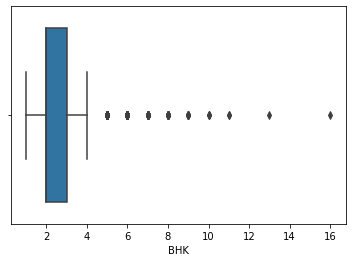

In [159]:
sns.boxplot(data['BHK'])

our bhk still has some outliers which need to be removed

In [162]:
#NOW CHECKING IF 2BHK AND 3BHK HAVE SAME PRICE IN SIMILAR LOCATION OF SAME TOTAL_SQFT
# WE PLOT A SCATTER PLOT
#THE PLOT WOULD TAKE A SPECIFIC LOCATION AND DATAFRAME AS INPUT
#IT WOULD COMPARE 2BHK AND 3BHK PRICE WITH SQFT AS A PARAMETER
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location)&(df.BHK==2)]
    bhk3=df[(df.location==location)&(df.BHK==3)]

  #matplotlib.reParams["figure.figsize"]=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color="blue",label="2 BHK",s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker="+",color="green",label="3 BHK",s=50)
    plt.xlabel("TOTAL_SQFT_AREA")
    plt.ylabel("PRICE")
    plt.title("LOCATION")

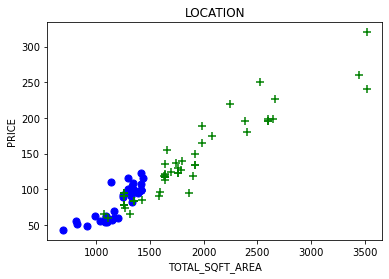

In [163]:
plot_scatter_chart(data,"Hebbal")

WE CAN SEE WHEN SAME SQFT 2BHK IS OF HIGHER PRICE THAN 3BHK THUS THIS COULD CREATE PRBEL IN PREDICTION SO REMOVE ALL 3BHK WITH SAME SQFT AS OF 2BHK AND LESS PRICE

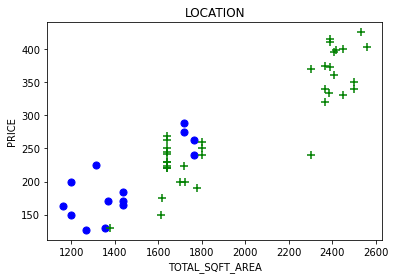

In [164]:
plot_scatter_chart(data,"Rajaji Nagar")

In [171]:
def bhk_outlier_remover(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby("location"):
        
        bhk_stats={}
        for BHK,bhk_df in location_df.groupby("BHK"):
            bhk_stats[BHK]={
            "mean":np.mean(bhk_df.price_per_sqft),
            "std":np.std(bhk_df.price_per_sqft),
            "count":bhk_df.shape[0]
      }
        for bhk,bhk_df in location_df.groupby("BHK"):
            stats=bhk_stats.get(BHK-1)
            if stats and stats["count"]>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats["mean"])].index.values)
    return df.drop(exclude_indices,axis="index")

In [172]:
data=bhk_outlier_remover(data)

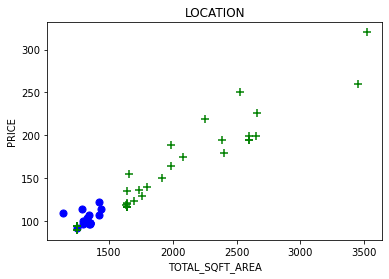

In [173]:
plot_scatter_chart(data,"Hebbal")

In [174]:
data.shape

(7493, 6)

In [175]:
data.drop(['price_per_sqft'],axis=1,inplace=True)

In [176]:
data.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [183]:
X=data.drop(['price'],axis=1)
y=data['price']

In [190]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import r2_score
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [184]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [185]:
X_train.shape


(5994, 4)

In [186]:
X_test.shape

(1499, 4)

### Linear Regression

In [189]:
column_trans=make_column_transformer((OneHotEncoder(sparse=False),['location']),remainder='passthrough')

In [191]:
scaler=StandardScaler()


In [192]:
lin_reg=LinearRegression(normalize=True)

In [193]:
pipe=make_pipeline(column_trans,scaler,lin_reg)

In [194]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(normalize=True))])

In [195]:
y_pred_lin=pipe.predict(X_test)

In [197]:
r2_score(y_test,y_pred_lin)

0.8076443961332356

### Lasso

In [198]:
lasso=Lasso()

In [199]:
pipe1=make_pipeline(column_trans,scaler,lasso)

In [200]:
pipe1.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [201]:
y_pred_lasso=pipe1.predict(X_test)

In [202]:
r2_score(y_test,y_pred_lasso)

0.7993292324346336

### Ridge

In [203]:
ridge=Ridge()

In [204]:
pipe2=make_pipeline(column_trans,scaler,ridge)

In [205]:
pipe2.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [206]:
y_pred_ridge=pipe2.predict(X_test)

In [207]:
r2_score(y_test,y_pred_ridge)

0.8078602576245604